In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [56]:
# READ DATA
full_df = pd.read_csv('celeba.csv')

In [57]:
# make the dataset
# Change this do desired number of fine tuning blocks
unfrozen_blocks = 3

# HIGHERST ACC
by_list = ['target_ds', 'num_training_images', 'seed', 'source_eps', 'unfrozen_blocks'] 

# HIGHEST EPOCH
group_by = ['target_ds', 'num_training_images', 'source_eps', 'seed', 'unfrozen_blocks']
best_df = full_df.groupby(by=group_by).apply(lambda x: x[x['epoch'] == max(x['epoch'])]).reset_index(drop=True)

inc = by_list + ['nat_prec1']
best_df = best_df.drop_duplicates(subset=inc).reset_index(drop=True)

data = best_df[((best_df['source_eps'].isin([0,3]))) & (best_df['unfrozen_blocks'] == unfrozen_blocks)]

target_ds_map = {
    # 'cifar100': 'CIFAR-100',
    'cifar10' : 'CIFAR-10',
    # 'svhn'    : 'SVHN',
    # 'fmnist'  : 'FMNIST',
    'kmnist'  : 'KMNIST',
    # 'mnist'   : 'MNIST',
}

data.replace(target_ds_map, inplace=True)

# get delta
source_eps_3 = data[(data['source_eps'] == 3)].sort_values(by=['num_training_images','seed']).reset_index(drop=True)
source_eps_0 = data[(data['source_eps'] == 0)].sort_values(by=['num_training_images','seed']).reset_index(drop=True)

delta_df = source_eps_3.copy()
delta_df['nat_prec1_delta'] =  source_eps_3['nat_prec1'] - source_eps_0['nat_prec1']
# delta_df['source_eps'] = '3 minus 0'


c:\Users\Admin\Desktop\comp-551-A4\venv\lib\site-packages\pandas\core\frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker
import matplotlib
%matplotlib inline



# Change this to plot desired dataset
def plot_graph(data,target,delta=True):
    axis_fontsize = 12
    
    xticks = np.sort(data[data['target_ds'] == target]['num_training_images'].unique())
    target_datasets = [target]

    plt.subplots(figsize=(15,5))
    plt.suptitle(f"{target} With {unfrozen_blocks} Unfrozen Block(s)", size=20)

    ax = plt.subplot(1, 2, 1)

    sns.lineplot(x='num_training_images', y='nat_prec1', style='source_eps', style_order=[3, 0],
                    data=data[data['target_ds'] == target], markers=True,
                    ax = ax,  markeredgecolor=sns.xkcd_rgb["dark grey"])

    ax.set_xscale('log',base=2)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_ylabel('Test Accuracy', fontsize=axis_fontsize)
    ax.set_xlabel('Number of training images', fontsize=axis_fontsize)
    ax.set_xticks(xticks[::2])

    ax.tick_params(axis='x', labelrotation=45)

    ax.legend(labels=['robust', 'natural'], loc='lower right', fontsize=8).set_zorder(0)
    if delta:
        ax = plt.subplot(1, 2, 2)

        sns.lineplot(x='num_training_images', y='nat_prec1_delta', hue='target_ds', hue_order=target_datasets, 
                    data=delta_df[delta_df['unfrozen_blocks'] == unfrozen_blocks], ax = ax,
                    markers=True, markeredgecolor=sns.xkcd_rgb["dark grey"], ci=None)

        ax.set_xscale('log',base=2)
        ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
        ax.set_xticks(xticks)
        # ax.set_title('Robust minus natural model accuracy')
        ax.set_ylabel('Test Accuracy Delta %', fontsize=axis_fontsize)
        ax.set_xlabel('Number of training images', fontsize=axis_fontsize)
        ax.tick_params(axis='x', labelrotation=45)


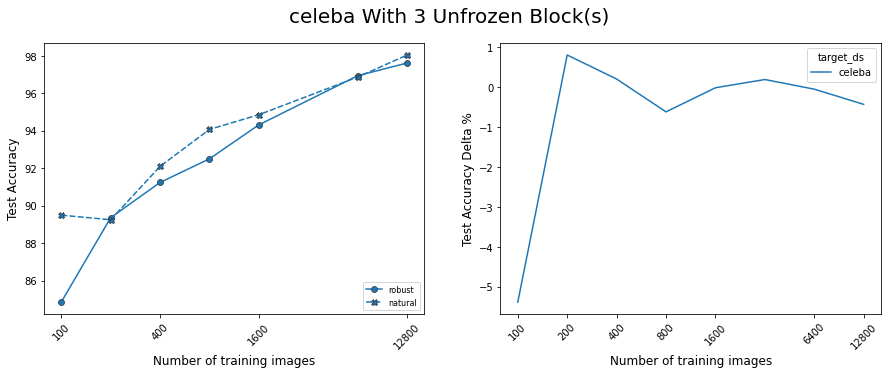

In [59]:
plot_graph(data[data['downscaled']==False],'celeba')

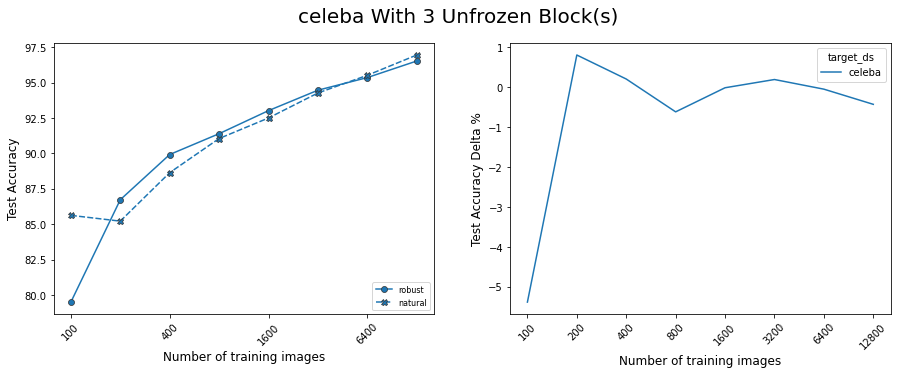

In [60]:
plot_graph(data[data['downscaled']==True],'celeba')

In [50]:
# make the dataset
# Change this do desired number of fine tuning blocks
unfrozen_blocks = 3

full_df = pd.read_csv('comparison.csv')

# HIGHERST ACC
by_list = ['target_ds', 'num_training_images', 'seed', 'source_eps', 'unfrozen_blocks'] 

# HIGHEST EPOCH
group_by = ['target_ds', 'num_training_images', 'source_eps', 'seed', 'unfrozen_blocks']
best_df = full_df.groupby(by=group_by).apply(lambda x: x[x['epoch'] == max(x['epoch'])]).reset_index(drop=True)

inc = by_list + ['nat_prec1']
best_df = best_df.drop_duplicates(subset=inc).reset_index(drop=True)

data_eps = best_df[((best_df['source_eps'].isin([3,4,8]))) & (best_df['unfrozen_blocks'] == unfrozen_blocks) & ((best_df['num_training_images'].isin([100,200,400,800,1600,3200,6400])))]
# data_eps = data_eps[data_eps['downscaled']==True]

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker
import matplotlib
%matplotlib inline

def plot_comparison(target):
    axis_fontsize = 12
    xticks = np.sort(data_eps[data_eps['target_ds'] == target]['num_training_images'].unique())

    ax = plt.subplot()
    plt.title(target)

    sns.lineplot(x='num_training_images', y='nat_prec1', style='source_eps', style_order=[3, 4, 8],
                    data=data_eps[data_eps['target_ds'] == target], markers=True,
                    ax = ax,  markeredgecolor=sns.xkcd_rgb["dark grey"],ci=None)

    ax.set_xscale('log',base=2)
    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.set_ylabel('Test Accuracy', fontsize=axis_fontsize)
    ax.set_xlabel('Number of training images', fontsize=axis_fontsize)
    ax.set_xticks(xticks[::2])

    ax.tick_params(axis='x', labelrotation=45)

# ax.legend(labels=['robust', 'natural'], loc='lower right', fontsize=8).set_zorder(0)

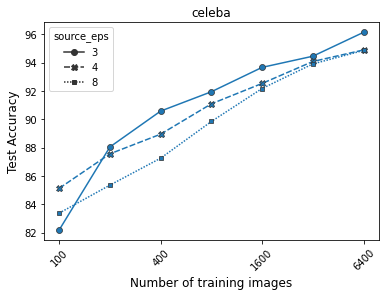

In [52]:
plot_comparison('celeba')

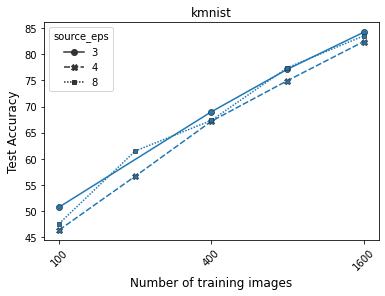

In [53]:
plot_comparison('kmnist')

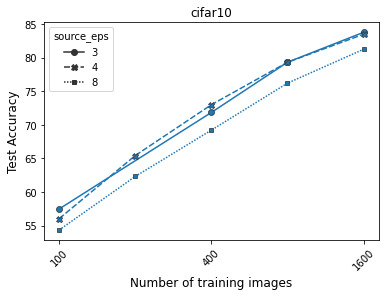

In [54]:
plot_comparison('cifar10')